# Bağımlı İki Örneklem T Testi

H0:mö=ms

H1:mö!=ms

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

In [7]:
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [11]:
# veri Seti I
AYRIK=pd.concat([before,after],axis=1)
AYRIK.columns=["BEFORE","AFTER"]
print("AYRIK veri seti:\n\n",AYRIK.head(),"\n\n")



# veri seti II
#before flag/tag'ını oluşturma
before_data=np.arange(len(before))
before_data=pd.DataFrame(before_data)
before_data[:]="BEFORE"
# flag ve before değerlerini bir araya getirme
A=pd.concat([before,before_data],axis=1)

#after flag/tag'ını oluşturma
after_data=np.arange(len(after))
after_data=pd.DataFrame(after_data)
after_data[:]="AFTER"
#flag ve after değerlerini birleştirme
B=pd.concat([after,after_data],axis=1)

AB=pd.concat([A,B],axis=0)
AB.columns=["PERFORMANCE","B/A"]
AB.head()

AYRIK veri seti:

    BEFORE  AFTER
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 




,PERFORMANCE,B/A
0,123,BEFORE
1,119,BEFORE
2,119,BEFORE
3,116,BEFORE
4,123,BEFORE


<AxesSubplot: xlabel='B/A', ylabel='PERFORMANCE'>

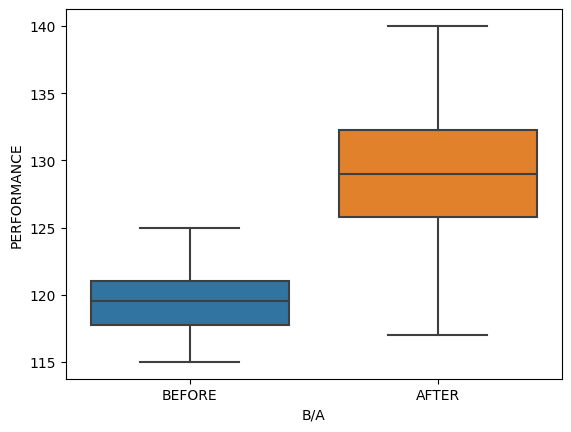

In [12]:
sns.boxplot(x="B/A", y="PERFORMANCE", data=AB)

grafikten after performasın daha iyi olduğu gözüküyor ancak bu durum şans eseri mi yoksa anlamlı bir fark var mı kontrolu yapıcaz

In [18]:
# Varsayım kontrolleri
#NORMALLİK
shapiro(AYRIK.BEFORE)

ShapiroResult(statistic=0.9543651342391968, pvalue=0.10722007602453232)

In [19]:
shapiro(AYRIK.AFTER)

ShapiroResult(statistic=0.9780091047286987, pvalue=0.6159570813179016)

In [25]:
#varyans homojenliği kontrolü
stats.levene(AYRIK.BEFORE, AYRIK.AFTER)

#H0 ( : varyans homejendir) red edilir
# varyans homojen değildir
# iki ihtimal  var bu durum göz ardı edilebilir yada veri düzenlenebilir
#göz ardı edicez

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [33]:
test_istatistigi, pvalue=stats.ttest_rel(AYRIK.BEFORE, AYRIK.AFTER)

In [37]:
print("test istatistiği : %.4f\np değer : %.4f"%(test_istatistigi,pvalue))

test istatistiği : -9.2815
p değer : 0.0000


In [38]:
#H0 red! :))